In [48]:
# Importations de packages
import numpy as np
import geopandas as gpd
import folium
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from shapely import Point
import seaborn as sns 

pd.options.display.max_columns = 999

In [14]:
from src.config import *
from src.utils import make_path, check_dir
from src.traitements import AppariementRunner
from src.traitements import get_communes_from_radius

In [15]:
roi_name = "lyon"

In [39]:
out_dir = check_dir(project_path, "reports", roi_name)
wh_app_path = make_path("Appariement", processed_data_path, roi_name, "{}") #roi_name, year, buffer_size

In [35]:
for f in os.listdir(out_dir): 
    print(make_path(f, out_dir))

/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2008_2023.csv
/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2008_2013.csv
/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2013_2023.csv
/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/.~lock.statistics_lyon_2008_2013.csv#


In [36]:
path = "/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2008_2023.csv"

In [19]:
df = pd.read_csv(path)

In [22]:
df.columns

Index(['radius', 'metro', 'mega_region', 'country', 'continent',
       'data_sources', 'time_period_start', 'time_period_end', 'years_data',
       'surfaces_area_available', 'urban_centrality', 'gateway', 'area',
       'number_mun', 'population_t0', 'density_pop_km2_t0', 'number_ware_t0',
       'number_ware_per_popM_t0', 'number_ware_per_1000km2_t0',
       'avg_size_ware_t0', 'gravity_t0', 'population_t1', 'density_pop_km2_t1',
       'number_ware_t1', 'number_ware_per_popM_t1',
       'number_ware_per_1000km2_t1', 'avg_size_ware_t1', 'gravity_t1',
       'pop_change', 'gravity_change', 'number_ware_change',
       'perc_ware_change', 'number_ware_per_popM_change',
       'log_sprawl_measure'],
      dtype='object')

### Evolution of wh Dist to centroid

In [46]:
year_t0 = "2008"
year_t1 = "2023"

s_buffer = 25

_fname = "Entrepots_{}_{}_{}km_app.gpkg" #roi_name, year, buffer_size

wh_app_path_t0 = make_path(_fname.format(roi_name.upper(), year_t0, s_buffer), wh_app_path.format(year_t0))
wh_app_path_t1 = make_path(_fname.format(roi_name.upper(), year_t1, s_buffer), wh_app_path.format(year_t1))

wh_t0 = gpd.read_file(wh_app_path_t0)
wh_t1 = gpd.read_file(wh_app_path_t1)


#wh_centroid = np.mean(wh_df.centroid.x), np.mean(wh_df.centroid.y)

def get_dist_centroid(wh_df): 
    wh_centroid = np.mean(wh_df.centroid.x), np.mean(wh_df.centroid.y)
    return wh_df.distance(Point(wh_centroid))

wh_t0["dist_centroid"] = get_dist_centroid(wh_t0)
wh_t1["dist_centroid"] = get_dist_centroid(wh_t1)



<Axes: >

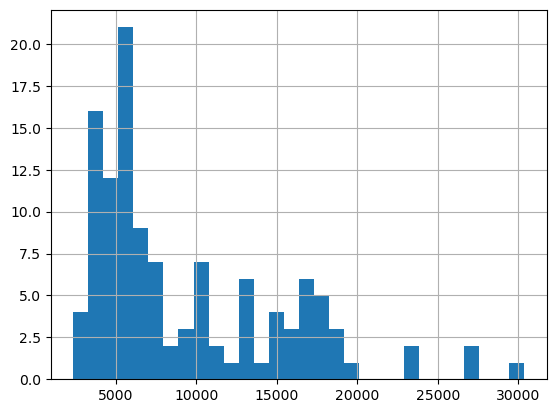

In [49]:
wh_t0["dist_centroid"].hist(bins=30)

<Axes: >

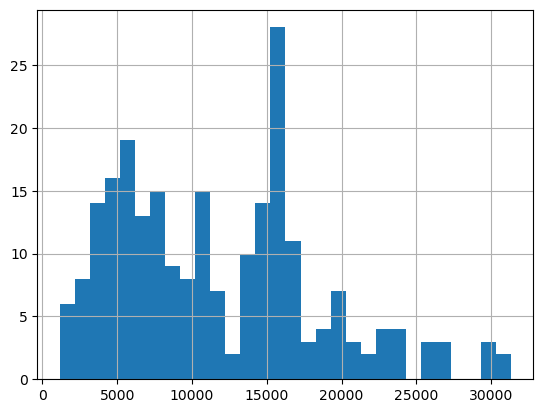

In [50]:
wh_t1["dist_centroid"].hist(bins=30)

<Axes: >

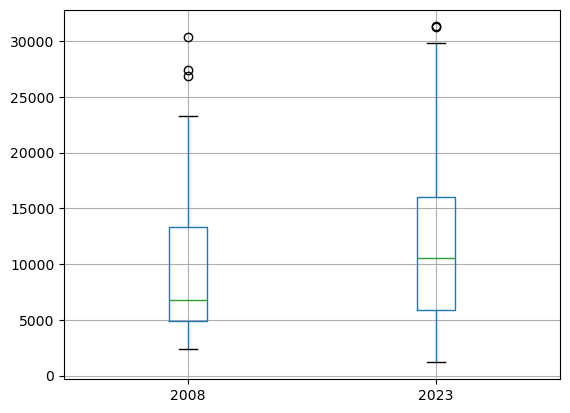

In [56]:
pd.concat([wh_t0["dist_centroid"].rename(f"{year_t0}"), wh_t1["dist_centroid"].rename(f"{year_t1}")], axis=1).boxplot()

<Axes: xlabel='dist_centroid'>

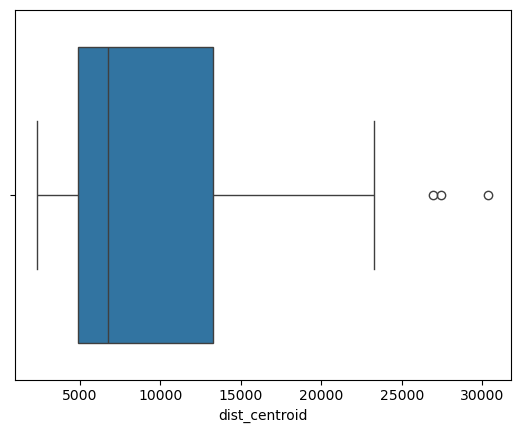

In [62]:
sns.boxplot(wh_t0["dist_centroid"],orient="h")

/tmp/ipykernel_45770/3122575473.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wh_t0["dist_centroid"], ax=ax_hist)


<Axes: xlabel='dist_centroid', ylabel='Density'>

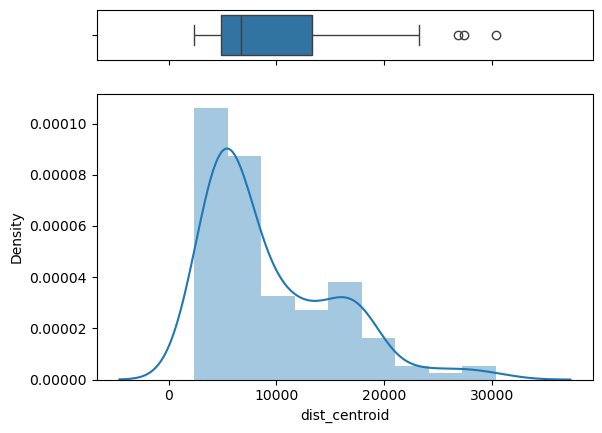

In [63]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(wh_t0["dist_centroid"], orient="h", ax=ax_box)
sns.distplot(wh_t0["dist_centroid"], ax=ax_hist)
#ax_box.set(xlabel='')

/tmp/ipykernel_45770/3623606491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wh_t0["dist_centroid"])


<Axes: xlabel='dist_centroid', ylabel='Density'>

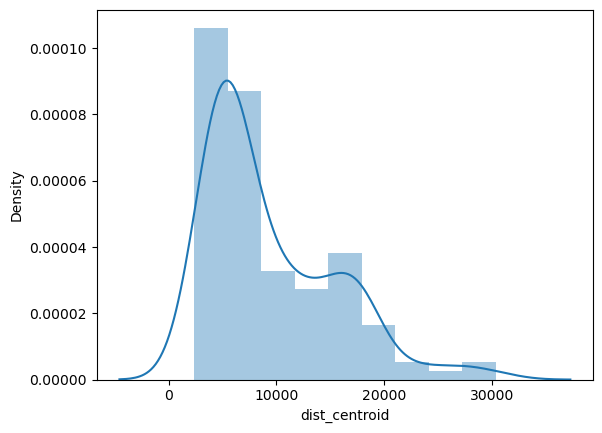

In [64]:
sns.distplot(wh_t0["dist_centroid"])

In [54]:
wh_t0.shape, wh_t1.shape

((118, 4), (233, 4))

In [20]:
df

,radius,metro,mega_region,country,continent,data_sources,time_period_start,time_period_end,years_data,surfaces_area_available,urban_centrality,gateway,area,number_mun,population_t0,density_pop_km2_t0,number_ware_t0,number_ware_per_popM_t0,number_ware_per_1000km2_t0,avg_size_ware_t0,gravity_t0,population_t1,density_pop_km2_t1,number_ware_t1,number_ware_per_popM_t1,number_ware_per_1000km2_t1,avg_size_ware_t1,gravity_t1,pop_change,gravity_change,number_ware_change,perc_ware_change,number_ware_per_popM_change,log_sprawl_measure
0,5,lyon,NaN,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,NaN,NaN,166.0,14,0.82,4929.90,33,40.0,0.000199,5294.38,3.47,1.16,6975.17,29,25.0,0.000175,3598.66,4.62,0.34,1.15,-4,-12.121212,-15.0,0.076667
1,10,lyon,NaN,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,NaN,NaN,507.6,50,1.23,2437.05,79,64.0,0.000156,5298.68,6.03,1.70,3352.14,100,59.0,0.000197,4396.42,6.61,0.47,0.58,21,26.582278,-5.0,0.038667
2,15,lyon,NaN,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,NaN,NaN,939.4,94,1.46,1558.64,95,65.0,0.000101,5598.12,7.05,2.11,2245.59,144,68.0,0.000153,5439.66,8.11,0.65,1.06,49,51.578947,3.0,0.070667
3,20,lyon,NaN,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,NaN,NaN,1664.6,148,1.69,1036.56,101,60.0,0.000062,5701.53,7.52,2.48,1491.00,173,70.0,0.000104,6490.78,9.83,0.79,2.31,72,71.287129,10.0,0.154000
4,25,lyon,NaN,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,NaN,NaN,2386.7,216,1.91,802.14,118,62.0,0.000049,6376.98,9.41,2.82,1181.97,233,83.0,0.000098,8925.48,11.75,0.91,2.34,115,97.457627,21.0,0.156000


Text(0.5, 1.0, 'log spraw w.r.t radius study area')

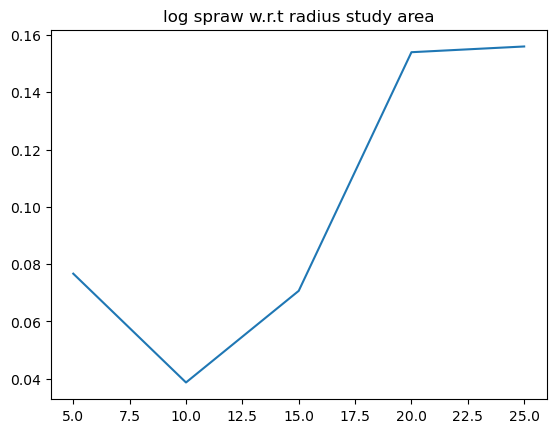

In [32]:
plt.plot(df["radius"], df["log_sprawl_measure"])
plt.title("log spraw w.r.t radius study area")

In [ ]:
plt.plot(df["radius"], df["log_sprawl_measure"])
plt.title("log spraw w.r.t radius study area")